# Klasyfikator $k$-NN

In [201]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier, KDTree as SklearnKDTree

## Ładowanie danych i preprocessing

### Wczytywanie danych

#### Zbiór *Breast Cancer*

In [3]:
data = load_breast_cancer()
X_cancer = pd.DataFrame(data.data, columns=data.feature_names)
y_cancer = data.target

In [4]:
X_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
y_cancer[:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1])

#### Zbiór *NYT*

In [6]:
data = pd.read_csv('./data/nyt-frame.csv')
data

,Unnamed: 0,class.labels,X.,X.d,X.nd,X.s,X.th,X.this,a,abandoned,...,yorkers,yorks,you,young,younger,your,youre,youth,youthful,yu
0,1,art,0.008707,0.0,0.0,0.000000,0.009251,0.0,0.007564,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,2,art,0.005848,0.0,0.0,0.000000,0.000000,0.0,0.001418,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
2,3,art,0.016036,0.0,0.0,0.011403,0.000000,0.0,0.010063,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,4,art,0.026415,0.0,0.0,0.000000,0.000000,0.0,0.008677,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,5,art,0.007285,0.0,0.0,0.011008,0.000000,0.0,0.008390,0.0,...,0.000000,0.0,0.048151,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,98,music,0.006929,0.0,0.0,0.000000,0.000000,0.0,0.005600,0.0,...,0.000000,0.0,0.024425,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
98,99,music,0.111882,0.0,0.0,0.000000,0.000000,0.0,0.003716,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
99,100,music,0.006550,0.0,0.0,0.000000,0.000000,0.0,0.009301,0.0,...,0.000000,0.0,0.029686,0.015659,0.0,0.026605,0.0,0.0,0.0,0.0
100,101,music,0.009497,0.0,0.0,0.000000,0.040362,0.0,0.003070,0.0,...,0.000000,0.0,0.066953,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0


In [7]:
X_nyt = data.drop(data.columns[0], axis=1)
X_nyt = X_nyt.drop('class.labels', axis=1)
X_nyt

,X.,X.d,X.nd,X.s,X.th,X.this,a,abandoned,abc,ability,...,yorkers,yorks,you,young,younger,your,youre,youth,youthful,yu
0,0.008707,0.0,0.0,0.000000,0.009251,0.0,0.007564,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.005848,0.0,0.0,0.000000,0.000000,0.0,0.001418,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.016036,0.0,0.0,0.011403,0.000000,0.0,0.010063,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.026415,0.0,0.0,0.000000,0.000000,0.0,0.008677,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.007285,0.0,0.0,0.011008,0.000000,0.0,0.008390,0.0,0.0,0.0,...,0.000000,0.0,0.048151,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.006929,0.0,0.0,0.000000,0.000000,0.0,0.005600,0.0,0.0,0.0,...,0.000000,0.0,0.024425,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
98,0.111882,0.0,0.0,0.000000,0.000000,0.0,0.003716,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
99,0.006550,0.0,0.0,0.000000,0.000000,0.0,0.009301,0.0,0.0,0.0,...,0.000000,0.0,0.029686,0.015659,0.0,0.026605,0.0,0.0,0.0,0.0
100,0.009497,0.0,0.0,0.000000,0.040362,0.0,0.003070,0.0,0.0,0.0,...,0.000000,0.0,0.066953,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0


In [8]:
y_nyt = data['class.labels']
y_nyt

0        art
1        art
2        art
3        art
4        art
       ...  
97     music
98     music
99     music
100    music
101    music
Name: class.labels, Length: 102, dtype: object

### Normalizacja

In [9]:
scaler = StandardScaler()

X_cancer_scaled = scaler.fit_transform(X_cancer)
X_nyt_scaled = scaler.fit_transform(X_nyt)

## Redukcja wymiarowości z wykorzystaniem PCA

In [10]:
pca = PCA(n_components=10)

X_cancer_pca = pca.fit_transform(X_cancer_scaled)
X_nyt_pca = pca.fit_transform(X_nyt_scaled)

## Pomiar dokładności klasyfikatora

In [150]:
def classifier_accuracy(cls, X, y, k_values):
    results = []
    
    for k in k_values:
        classifier = cls(n_neighbors=k)
        scores = cross_val_score(classifier, X, y, cv=10)  # 10-fold cross-validation
        results.append(scores.mean())
        
    return results

In [12]:
k_values = [1, 3, 5, 7]

### Zbiór *Breast Cancer*

In [151]:
for k, acc in zip(k_values, classifier_accuracy(KNeighborsClassifier, X_cancer_pca, y_cancer, k_values)):
    print(f'Accuracy for k={k} on breast cancer data: {acc:.2f}')

Accuracy for k=1 on breast cancer data: 0.96
Accuracy for k=3 on breast cancer data: 0.96
Accuracy for k=5 on breast cancer data: 0.96
Accuracy for k=7 on breast cancer data: 0.97


### Zbiór *NYT*

In [152]:
for k, acc in zip(k_values, classifier_accuracy(KNeighborsClassifier, X_nyt_pca, y_nyt, k_values)):
    print(f'Accuracy for k={k} on NYT data: {acc:.2f}')

Accuracy for k=1 on NYT data: 0.69
Accuracy for k=3 on NYT data: 0.78
Accuracy for k=5 on NYT data: 0.80
Accuracy for k=7 on NYT data: 0.81


## Wpływ wag odległości oraz innej miary na rezultaty

### Pomocnicze funkcje

In [153]:
def test_weights_metrics(X, y, weights, metrics, k_values):
    results = []
    
    for k in k_values:
        for weight in weights:
            for metric in metrics:
                classifier = KNeighborsClassifier(n_neighbors=k, weights=weight, metric=metric)
                scores = cross_val_score(classifier, X, y, cv=10)  # 10-fold cross-validation
                accuracy = scores.mean()
                results.append((k, weight, metric, accuracy))
                
    return pd.DataFrame(results, columns=['k', 'weight', 'metric', 'accuracy'])

def plot_test_results(df_results):
    k_values = df_results['k'].unique()
    weights_options = df_results['weight'].unique()
    distance_metrics = df_results['metric'].unique()
    
    cols_count = len(weights_options)
    rows_count = len(distance_metrics)
    fig, axs = plt.subplots(rows_count, cols_count, figsize=(cols_count * 6, rows_count * 4))

    for i, metric in enumerate(distance_metrics):
        for j, weight in enumerate(weights_options):
            df_subset = df_cancer_results[(df_cancer_results['weight'] == weight) & (df_cancer_results['metric'] == metric)]
            for k in k_values:
                acc = df_subset[df_subset['k'] == k]['accuracy']
                axs[i, j].plot(k, acc, 'bo')
                axs[i, j].set_title(f'Weight: {weight}, Metric: {metric}')

### Sprawdzanie wpływu wag i miar na *accuracy*

In [154]:
weights_options = ['uniform', 'distance']
distance_metrics = ['euclidean', 'manhattan', 'cosine', 'correlation']

#### Zbiór *Breast Cancer*

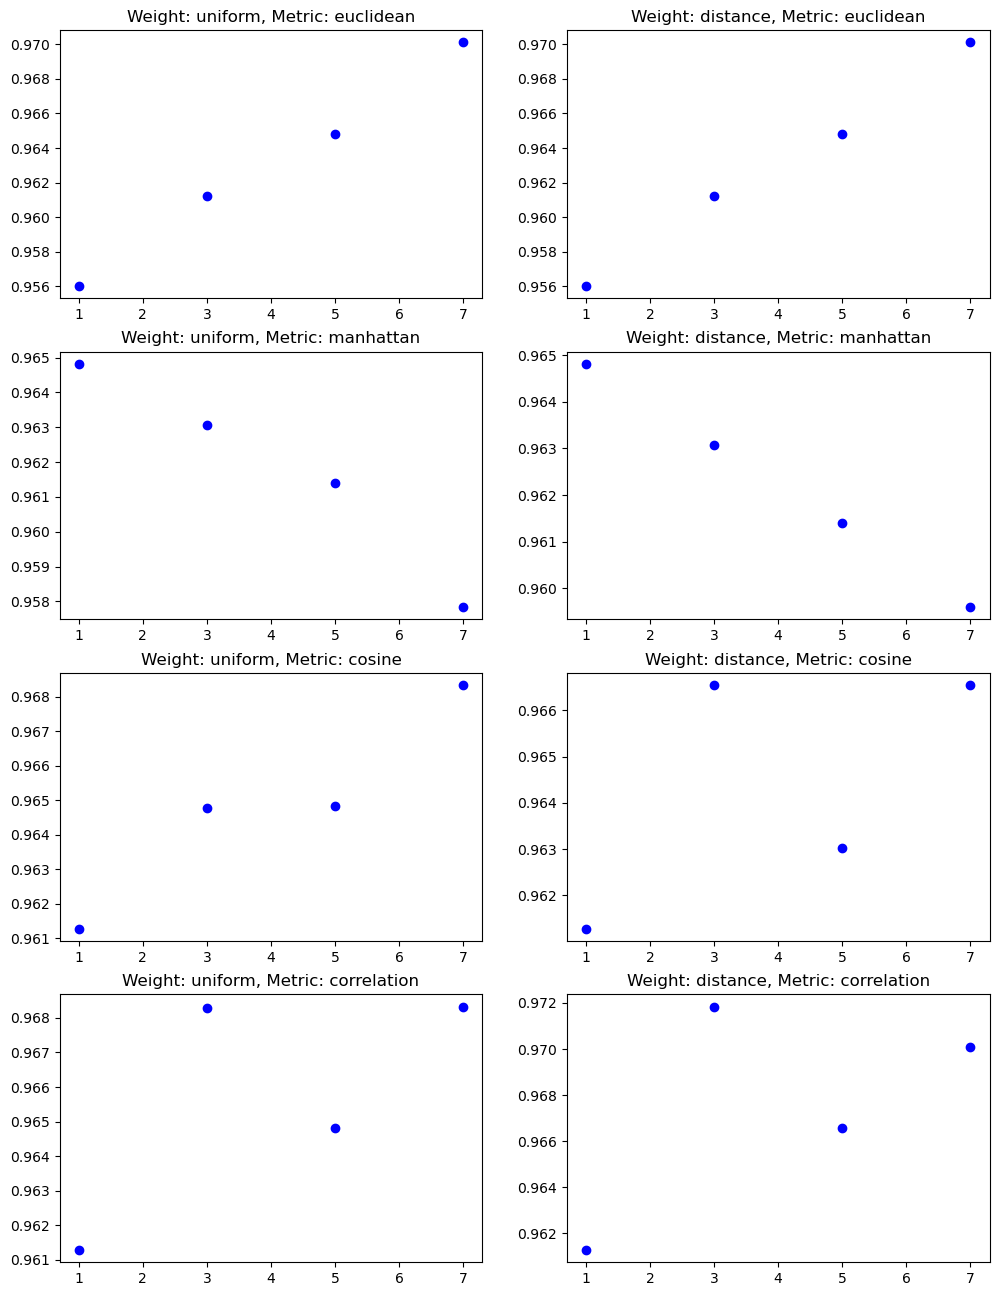

In [155]:
df_cancer_results = test_weights_metrics(X_cancer_pca, y_cancer, weights_options, distance_metrics, k_values)
plot_test_results(df_cancer_results)

#### Zbiór *NYT*

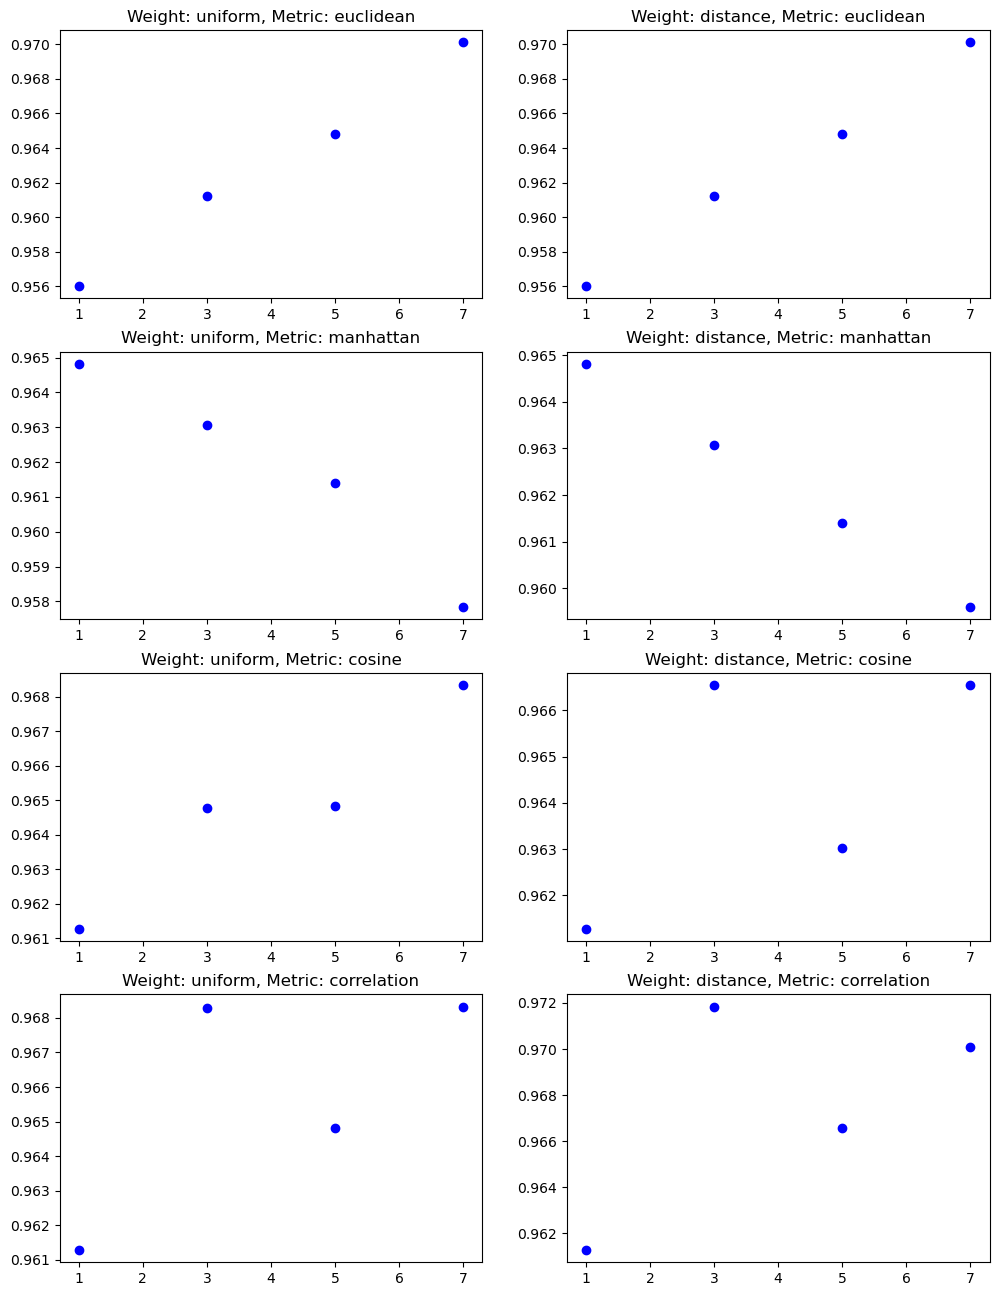

In [156]:
df_nyt_results = test_weights_metrics(X_nyt_pca, y_nyt, weights_options, distance_metrics, k_values)
plot_test_results(df_nyt_results)

## Algorytm KD-tree dla $n$ wymiarów

### Implementacja KD-tree

In [197]:
class Node:
    def __init__(self, point, index, left=None, right=None, axis=0):
        self.point = point
        self.index = index
        self.left = left
        self.right = right
        self.axis = axis

class KDTree:
    def __init__(self, points):
        self.dim = len(points[0])
        self.root = self.build_kdtree(list(enumerate(points)))

    def build_kdtree(self, points, depth=0):
        if not points:
            return None
        axis = depth % self.dim
        points.sort(key=lambda x: x[1][axis])
        median = len(points) // 2
        return Node(
            point=points[median][1],
            index=points[median][0],
            left=self.build_kdtree(points[:median], depth + 1),
            right=self.build_kdtree(points[median+1:], depth + 1),
            axis=axis
        )

    def k_nearest_neighbors(self, query_point, k):
        best = []

        def search(node, depth=0):
            if node is None:
                return
            axis = depth % self.dim

            next_node = node.left if query_point[axis] < node.point[axis] else node.right
            opposite_node = node.right if query_point[axis] < node.point[axis] else node.left

            search(next_node, depth + 1)

            dist = np.linalg.norm(np.array(query_point) - np.array(node.point))
            best.append((dist, node.index))
            best.sort(key=lambda x: x[0])
            if len(best) > k:
                best.pop()

            if len(best) < k or (node.point[axis] - query_point[axis])**2 < best[-1][0]:
                search(opposite_node, depth + 1)

        search(self.root)
        return [idx for _, idx in best]

### Testy KD-tree (porównanie z implementacją z sklearn)

In [198]:
n = 10 # number of dimensions
points_count = 100
k = 5

points = [[np.random.rand() for _ in range(n)] for _ in range(points_count)]
query_point = [np.random.rand() for _ in range(n)]

In [199]:
kdtree = KDTree(points)
nearest = kdtree.k_nearest_neighbors(query_point, k=k)
print(nearest)

[18, 26, 32, 4, 80]


In [202]:
sklearn_kdtree = SklearnKDTree(points)
distances, indices = sklearn_kdtree.query([query_point], k=k)
print(indices)

[[18 26 32  4 80]]
